---
## Natural Evolution Strategy(NES)
- purpose: 
    - multi-dimensional, real-value(continuous search space), black-box optimization
    - 직접 weight를 optimize하지 않고 (weight의)distribution의 parameter를 optimize해
      새로운 weight후보를 sampling추출하는 방식

- steps: 
    - 오직 better individual이 되기위한 mutation에 집중됨
    - population: 각 individual은 (search) distribution으로부터 sampling됨.
    - mutation과정은 **(search) distribution parameter, theta를 update하는 과정임(i.e., Gaussian분포라 가정하면 mu와 cov.)**
        - Sample들과 그 fitness값을 이용해 Monte Carlo simulation방식으로, theta에 대한 gradient를 추정.
        - gradient를 Natural gradient로 바꿈.
        - 높은 기대값의 fitness를 구하는 방향으로 gradient ascent방식으로 theta를 update한다. 
        - **(search) distribution의 모양을 adaptive방식으로 capture하는 것**
       
- usage:
    - complex function optimization에 사용
    - **Natural Gradient를 사용**해 objective에 대한 정보가 없는 경우, continuous, complex, noisy, 시간에 따라 변하는 문제에 적용가능 
    - parallel computing, multi-objective, contraint optimization 적용가능
    
- papaers:
    - Natural Evolution Strategies - Daan Wierstra et.al
    - Benchmarking Separable Natural Evolution Strategies on the Noiseless and Noisy Black-box Optimization Testbeds - Tom Schaul

In [3]:
"""
[코드참고: https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d]
"""
"""
A bare bones examples of optimizing a black-box function (f) using
Natural Evolution Strategies (NES), where the parameter distribution is a 
gaussian of fixed standard deviation.
"""

import numpy as np
np.random.seed(0)

# the function we want to optimize
def f(w):
    # here we would normally:
    # ... 1) create a neural network with weights w
    # ... 2) run the neural network on the environment for some time
    # ... 3) sum up and return the total reward

    # but for the purposes of an example, lets try to minimize
    # the L2 distance to a specific solution vector. So the highest reward
    # we can achieve is 0, when the vector w is exactly equal to solution
    
    reward = -np.sum(np.square(solution - w))
    return reward
    
# hyperparameters
npop = 50 # population size
sigma = 0.1 # noise standard deviation
alpha = 0.001 # learning rate

# start the optimization
solution = np.array([0.5, 0.1, -0.3])
w = np.random.randn(3) # our initial guess is random
for i in range(300):

    # print current fitness of the most likely parameter setting
    if i % 20 == 0:
        print('iter %d. w: %s, solution: %s, reward: %f' % 
          (i, str(w), str(solution), f(w)))

    # initialize memory for a population of w's, and their rewards
    N = np.random.randn(npop, 3) # samples from a normal distribution N(0,1)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma*N[j] # jitter w using gaussian of sigma 0.1
        R[j] = f(w_try) # evaluate the jittered version
        
    # standardize the rewards to have a gaussian distribution
    A = (R - np.mean(R)) / np.std(R)
    
    # perform the parameter update. The matrix multiply below
    # is just an efficient way to sum up all the rows of the noise matrix N,
    # where each row N[j] is weighted by A[j]
    w = w + alpha/(npop*sigma) * np.dot(N.T, A)

# when run, prints:
# iter 0. w: [ 1.76405235  0.40015721  0.97873798], solution: [ 0.5  0.1 -0.3], reward: -3.323094
# iter 20. w: [ 1.63796944  0.36987244  0.84497941], solution: [ 0.5  0.1 -0.3], reward: -2.678783
# iter 40. w: [ 1.50042904  0.33577052  0.70329169], solution: [ 0.5  0.1 -0.3], reward: -2.063040
# iter 60. w: [ 1.36438269  0.29247833  0.56990397], solution: [ 0.5  0.1 -0.3], reward: -1.540938
# iter 80. w: [ 1.2257328   0.25622233  0.43607161], solution: [ 0.5  0.1 -0.3], reward: -1.092895
# iter 100. w: [ 1.08819889  0.22827364  0.30415088], solution: [ 0.5  0.1 -0.3], reward: -0.727430
# iter 120. w: [ 0.95675286  0.19282042  0.16682465], solution: [ 0.5  0.1 -0.3], reward: -0.435164
# iter 140. w: [ 0.82214521  0.16161165  0.03600742], solution: [ 0.5  0.1 -0.3], reward: -0.220475
# iter 160. w: [ 0.70282088  0.12935569 -0.09779598], solution: [ 0.5  0.1 -0.3], reward: -0.082885
# iter 180. w: [ 0.58380424  0.11579811 -0.21083135], solution: [ 0.5  0.1 -0.3], reward: -0.015224
# iter 200. w: [ 0.52089064  0.09897718 -0.2761225 ], solution: [ 0.5  0.1 -0.3], reward: -0.001008
# iter 220. w: [ 0.50861791  0.10220363 -0.29023563], solution: [ 0.5  0.1 -0.3], reward: -0.000174
# iter 240. w: [ 0.50428202  0.10834192 -0.29828744], solution: [ 0.5  0.1 -0.3], reward: -0.000091
# iter 260. w: [ 0.50147991  0.1044559  -0.30255291], solution: [ 0.5  0.1 -0.3], reward: -0.000029
# iter 280. w: [ 0.50208135  0.0986722  -0.29841024], solution: [ 0.5  0.1 -0.3], reward: -0.000009




iter 0. w: [1.76405235 0.40015721 0.97873798], solution: [ 0.5  0.1 -0.3], reward: -3.323094
iter 20. w: [1.63796944 0.36987244 0.84497941], solution: [ 0.5  0.1 -0.3], reward: -2.678783
iter 40. w: [1.50042904 0.33577052 0.70329169], solution: [ 0.5  0.1 -0.3], reward: -2.063040
iter 60. w: [1.36438269 0.29247833 0.56990397], solution: [ 0.5  0.1 -0.3], reward: -1.540938
iter 80. w: [1.2257328  0.25622233 0.43607161], solution: [ 0.5  0.1 -0.3], reward: -1.092895
iter 100. w: [1.08819889 0.22827364 0.30415088], solution: [ 0.5  0.1 -0.3], reward: -0.727430
iter 120. w: [0.95675286 0.19282042 0.16682465], solution: [ 0.5  0.1 -0.3], reward: -0.435164
iter 140. w: [0.82214521 0.16161165 0.03600742], solution: [ 0.5  0.1 -0.3], reward: -0.220475
iter 160. w: [ 0.70282088  0.12935569 -0.09779598], solution: [ 0.5  0.1 -0.3], reward: -0.082885
iter 180. w: [ 0.58380424  0.11579811 -0.21083135], solution: [ 0.5  0.1 -0.3], reward: -0.015224
iter 200. w: [ 0.52089064  0.09897718 -0.2761225 ]

# NES_v2.2

In [4]:
from math import *
import numpy as np
from scipy.stats import multivariate_normal
import scipy.stats
np.random.seed(0)

# the function we want to optimize
def fobj_(w):
    # take negative. because of NES's only gradient ascent.
    reward = -np.sum(np.square(solution - w))
    return reward

def nes(f, alpha=0.001, sigma=0.1, npop=5000, its=1000):

    w = np.random.randn(3) # our initial guess is random

    for i in range(its):

        # print current fitness of the most likely parameter setting
        if i % 20 == 0:
            print('iter %d. w: %s, solution: %s, reward: %f' % 
              (i, str(w), str(solution), f(w)))

        # initialize memory for a population of w's, and their rewards
        N = np.random.randn(npop, 3) # samples from a normal distribution N(0,1)
        R = np.zeros(npop)
        for j in range(npop):
            w_try = w + sigma*N[j] # jitter w using gaussian of sigma 0.1
            R[j] = f(w_try) # evaluate the jittered version

        # standardize the rewards to have a gaussian distribution
        A = (R - np.mean(R)) / np.std(R)

        # perform the parameter update. The matrix multiply below
        # is just an efficient way to sum up all the rows of the noise matrix N,
        # where each row N[j] is weighted by A[j]
        w = w + alpha/(npop*sigma) * np.dot(N.T, A)

        yield w, f(w)

iter 0. w: [0.24609468 1.74473559 0.60329413], solution: [ 0.5  0.1 -0.3], reward: -3.585563
iter 20. w: [0.27213483 1.57222097 0.50758051], solution: [ 0.5  0.1 -0.3], reward: -2.871543
iter 40. w: [0.29931208 1.39872792 0.41265703], solution: [ 0.5  0.1 -0.3], reward: -2.234850
iter 60. w: [0.32627166 1.2251898  0.31752627], solution: [ 0.5  0.1 -0.3], reward: -1.677572
iter 80. w: [0.35235917 1.05262693 0.22222417], solution: [ 0.5  0.1 -0.3], reward: -1.202014
iter 100. w: [0.3793243  0.88038886 0.12880622], solution: [ 0.5  0.1 -0.3], reward: -0.807444
iter 120. w: [0.40585262 0.70880061 0.03416105], solution: [ 0.5  0.1 -0.3], reward: -0.491166
iter 140. w: [ 0.4323583   0.53889219 -0.05938014], solution: [ 0.5  0.1 -0.3], reward: -0.255100
iter 160. w: [ 0.45744291  0.37265986 -0.15090062], solution: [ 0.5  0.1 -0.3], reward: -0.098385
iter 180. w: [ 0.47999527  0.22215866 -0.2333023 ], solution: [ 0.5  0.1 -0.3], reward: -0.019772
iter 200. w: [ 0.4950797   0.13062281 -0.283439

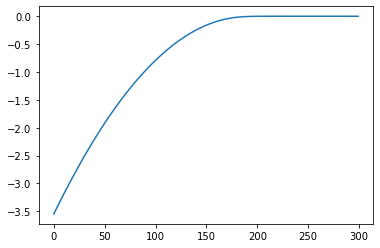

In [7]:
import matplotlib.pyplot as plt

solution = np.array([0.5, 0.1, -0.3])

result = list(nes(fobj_, alpha= 0.001, sigma= 0.1, its=300))

x, f = zip(*result)
plt.plot(f)